In [233]:
#These 2 lines automatically update the Jupyter notebook with the latest Python files you have imported so
#you do not have to restart the Jupyter notebook every time you make a change. 
%load_ext autoreload 
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np

from dsp_toolbox import dft, apply_dft_matrix, create_dft_matrix, plot_dft_magnitude_angle, idft, convolve_signals, zero_pad_signal
from utils import visualize_dft_matrix, generate_gaussian_kernel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Numpy and Matplotlib Python Libraries Primer

In [234]:
N = 32 # Number of samples in the signal
t_indices = np.arange(0,N) # This creates the time series indices.

In [235]:
f = 2/N #Frequency of the signal
y_signal = np.sin(2*np.pi*f*t_indices) #Creating the signal by inputting the temporal indices

In [236]:
# Often when things go wrong with your code, its useful to inspect the variables
# One way we can do this is by printing the parameters of the variables. With numpy this is easy!
size_of_T_array = t_indices.shape
size_of_Y_array = y_signal.shape
print(f"Size of <size_of_T_array> is: {size_of_T_array}")
print(f"Size of <size_of_Y_array> is: {size_of_T_array}")
print(f"Value of 4th item in <y_signal> is: {y_signal[3]}")
print(f"Values of 2nd through 5th items in <y_signal> is: {y_signal[1:6]}")

Size of <size_of_T_array> is: (32,)
Size of <size_of_Y_array> is: (32,)
Value of 4th item in <y_signal> is: 0.9238795325112867
Values of 2nd through 5th items in <y_signal> is: [0.38268343 0.70710678 0.92387953 1.         0.92387953]


Text(0.5, 0, 'Sample Number (n)')

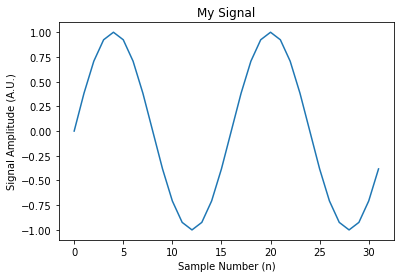

In [237]:
# Plotting a signal
plt.figure()
plt.plot(t_indices, y_signal)
plt.title("My Signal")
plt.ylabel("Signal Amplitude (A.U.)")
plt.xlabel("Sample Number (n)")

# 2. DFT Basics

## 2.1 Create the DFT Matrix
In this section, find the <create_dft_matrix> function in dsp_toolbox.py and implement the function.

In [238]:
M = 16 #Do not change this value.
dft_mat = create_dft_matrix(length = M)

We can visualize the matrix using the [visualize_dft_matrix] function, which plots each row of the matrix and seperates the real and imaginary components. Check the implementation for more information.

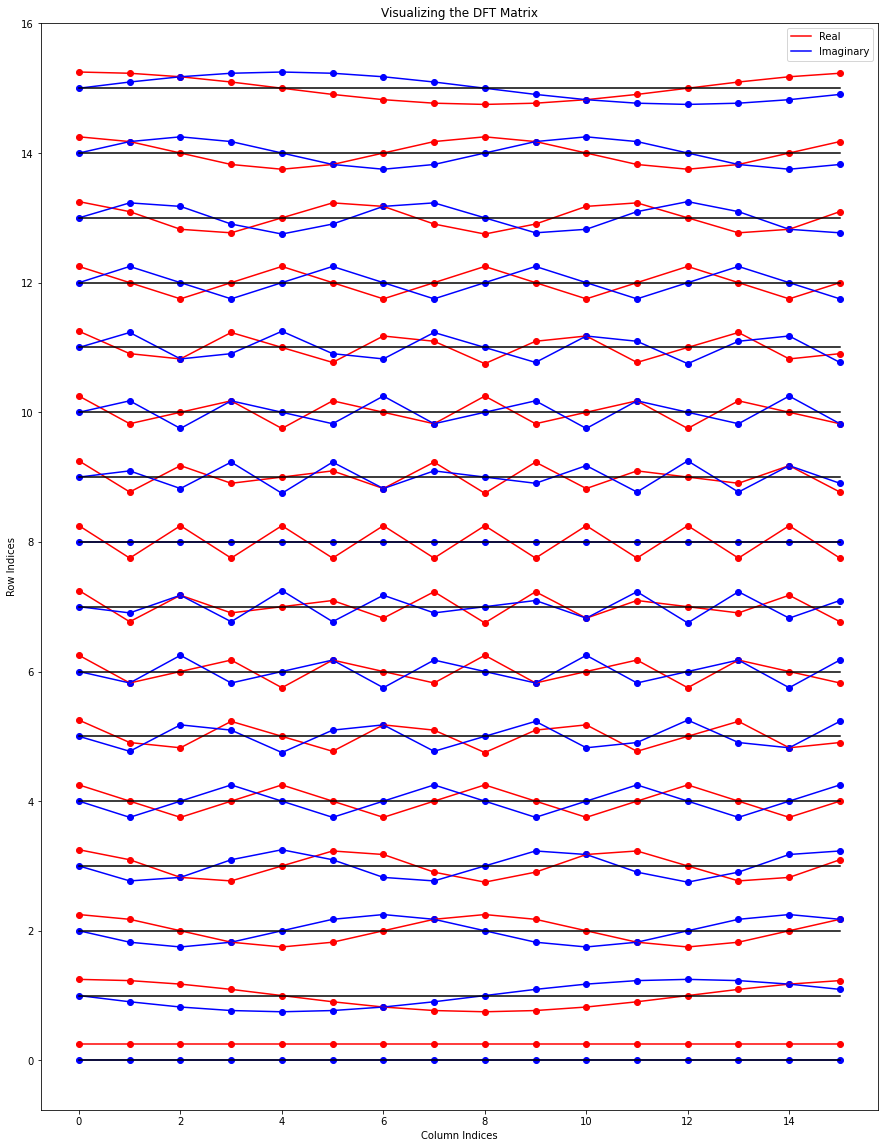

In [239]:
visualize_dft_matrix(dft_mat)

Q1: What is an interesting property you can see of this matrix by looking at the plots?

Answer: - you are plotting the real and imaginary part. When you have a complex exponential in this way, you have information about the phase and frequency. 

The bottom signal is all 1's - constant frequency. So it measure's the DC component of the signal. 




## 2.2 Take the DFT of a Signal

Implement the <apply_dft_matrix> function in the dsp_toolbox.py file and run the remaining cells in this section.

(32,)
[0.00000000e+00 2.15610466e-15 1.60000000e+01 4.47381980e-15
 1.25896547e-15 5.91839949e-15 7.61240193e-15 4.66437206e-16
 2.93651599e-15 6.09539917e-15 3.36156765e-15 5.12672346e-15
 1.41297712e-14 2.39024965e-15 9.22080356e-15 1.18799252e-14
 6.81235315e-15 9.71363137e-15 1.01349681e-14 7.05173372e-15
 7.45910699e-15 4.61276457e-15 1.41599495e-14 9.71692654e-15
 1.70920964e-14 1.03893654e-14 1.22812871e-14 2.48098852e-14
 2.26950871e-14 3.60592100e-14 1.60000000e+01 9.53892900e-14]
the non-zero values (abs) are 15.999999999999988
the non-zero values (not abs) are (-2.9277749416192283e-15-15.999999999999988j)
the non-zero values (abs) are 15.999999999999819
the non-zero values (not abs) are (-6.329080438059936e-14+15.999999999999819j)


/Users/sgb/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


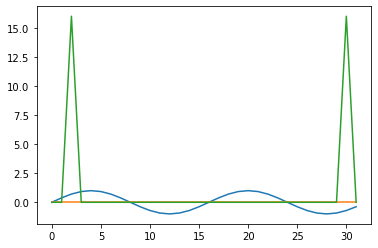

In [240]:
Fy_signal = dft(y_signal)

plt.plot(y_signal)
plt.plot(Fy_signal)
plt.plot(np.abs(Fy_signal))
#plt.stem(np.abs(Fy_signal))

print(Fy_signal.shape)

absolutevalue = np.abs(Fy_signal)
print(absolutevalue)

for i in range(len(absolutevalue)): 
    if (absolutevalue[i] > 0.0005):
        print(f"the non-zero values (abs) are {absolutevalue[i]}")
        print(f"the non-zero values (not abs) are {Fy_signal[i]}")

Text(0.5, 0, 'Frequency Bins')

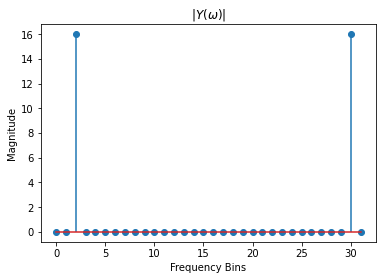

In [241]:
plt.stem(np.abs(Fy_signal))
plt.title(r"$|Y(\omega)|$")
plt.ylabel("Magnitude")
plt.xlabel("Frequency Bins")

Q2: Explain why the DFT Plot appears the way it does (why are there only two non-zero points)?

Answer: - complex sinusoids come in pairs, there is one frequency but it has its complex conjugate pair. -pi and pi have the same phase. I am seeing peaks at frequencies w and -w, where w is the frequency of the sine wave

Q3: Inspect the values of the non-zero locations of the DFT of the signal, are they real, imaginary, both? Why?

Answer: the values are complex. you multiply the values of the signal (discrete, real) by the DFT matrix which is populated with complex components. Multiplying these together ensures the output is complex, and the complex nature of the answer best represents the sine waves


## 2.3 Plotting and Visualizing the DFT

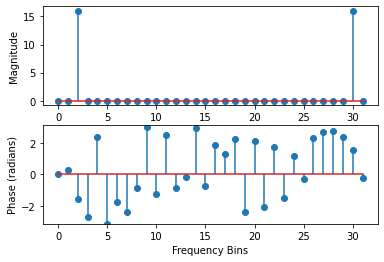

In [242]:
plot_dft_magnitude_angle(np.arange(N), f_signal=Fy_signal, format=None)

Q4: You may notice that the Phase Plot looks non-sensical, why would that be the case?

Answer: - phase values for frequency bins with 0 amplitude (the frequency components that are not contributing to the construction of our original y_signal) is not defined therefore the values are not meaningful except: 

phase values of bin 2 and 30 as these have a non-zero magnitude. these are the complex cojugates therefore they have same magnitude opposite phase. this is confirmed in the plot

You will often come across different ways of plotting the DFT. Please implement these forms in the following blocks by changing the [plot_dft_magnitude_angle] function and the input parameter [format].

### 2.3.1 Set the phase to zero if the magnitude of any point in the DFT is less than some small value (e.g. 1e-1)

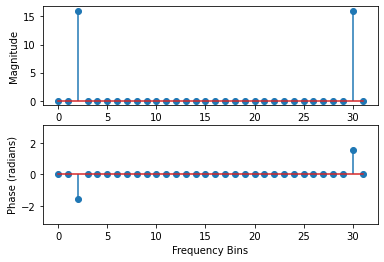

In [243]:
plot_dft_magnitude_angle(np.arange(N), f_signal=Fy_signal, format="ZeroPhase")

### 2.3.2 Plot DFT such that the Frequency axis is normalized between [0, 1]

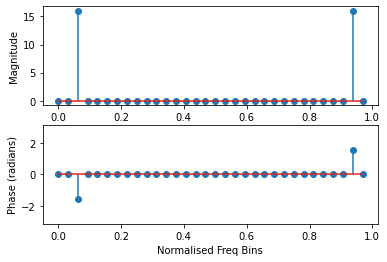

In [244]:
plot_dft_magnitude_angle(np.arange(N), f_signal=Fy_signal, format="Normalized")

### 2.3.3 Plot DFT such that the Frequency axis is normalized between [-0.5, 0.5]

Hint: This will require shifting indices around.

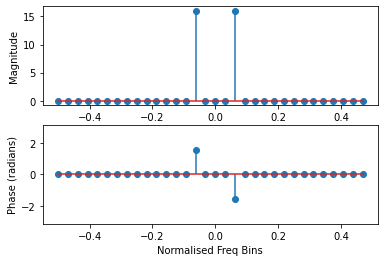

In [245]:
plot_dft_magnitude_angle(np.arange(N), f_signal=Fy_signal, format="Centered_Normalized")

## 2.4 The inverse DFT

Implement the [idft] function by reusing functions you have already implemented.

/Users/sgb/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


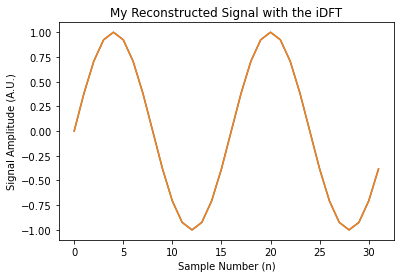

In [246]:
reconstructed_y_signal = idft(Fy_signal)

plt.figure()
plt.plot(t_indices, reconstructed_y_signal)
plt.title("My Reconstructed Signal with the iDFT")
plt.ylabel("Signal Amplitude (A.U.)")
plt.xlabel("Sample Number (n)")

plt.plot(y_signal)

In [247]:
# plt.figure()
# plt.plot(t_indices, reconstructed_y_signal)
# plt.title("My Reconstructed Signal with the iDFT")
# plt.ylabel("Signal Amplitude (A.U.)")
# plt.xlabel("Sample Number (n)")

# plt.plot()

In [248]:
# Lets check the difference between the two signals by computing the L2 distance between them
# If this is much less than 1e-4 than we have done the idft correctly.
l2_dist = np.sqrt(np.sum(np.square(np.abs(reconstructed_y_signal - y_signal))))
print(f"The L2 distance between the 2 signals is: {l2_dist}")

The L2 distance between the 2 signals is: 7.5317551127341e-14


# 3. Properties of the DFT

## 3.1 Leakage in Spectrum

Text(0.5, 0, 'Sample Number (n)')

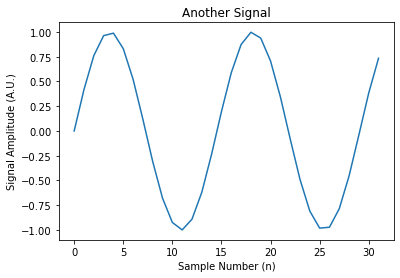

In [271]:
N = 32 # Number of samples in the signal
t_indices = np.arange(0,N) # This creates the time series indices.
f = 2.2/N #Frequency of the signal
y_leaky_signal = np.sin(2*np.pi*f*t_indices) #Creating the signal by giving the temporal indices

# spectral leakage occurs when a non-integer number is period is sent to the DFT

plt.figure()
plt.plot(t_indices, y_leaky_signal)
plt.title("Another Signal")
plt.ylabel("Signal Amplitude (A.U.)")
plt.xlabel("Sample Number (n)")

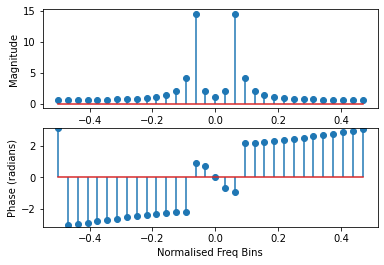

In [272]:
Fy_leak_signal = dft(y_leaky_signal)
plot_dft_magnitude_angle(np.arange(N) , Fy_leak_signal, format="Centered_Normalized")

Q5: The frequency used to generate the sinusoidal signal is similar to the one used in Part 1. Then why does the frequency spectrum look like this?

Answer: The DTF assumes that its input signal is one period of a periodic signal. Its output are the discrete frequencies of the periodic signal. 

Therefore, the DFT will intepret our sine wave in an incorrect way based on a full period. In the DFT's intepretation, there will be an abrupt jump between one period and the next one because it won't have measured a full period of our signal. Given this behaviour at the period's edge, the DFT will not consist of a single sine wave, but rather many frequencies needed to reconstruct this behaviour.  If we were to measure exactly an integer multiple of the signal period, the spectral leakage will disappear, because the DFT sees a purely periodic signal in this case:

## 3.2 Frequency Resolution

### 3.2.1 Rescaling the X-axis

Modify the plot function to rescale the X-axis to plot the spectrum w.r.t the original frequency limits (Modify the "centered" case to obtain the rescaled plots). For example, if the sampling frequency is 8000Hz, then the x-axis should be [-4000Hz,4000Hz]

Use the key-word argument [fs] to specify the sampling frequency. We'll call this [format="Centered_Original_Scale"]. 

N is 32


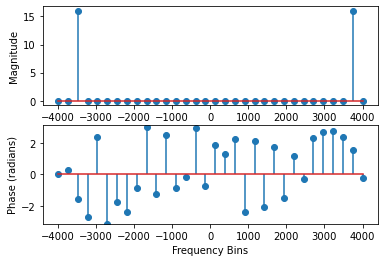

In [286]:
fs = 8000 # Don't alter this value. This is the sampling frequency

## for future debugging, check what N is stored as!

print("N is", N)

plot_dft_magnitude_angle(np.arange(N), f_signal=Fy_signal, fs=8000, format= "Centered_Original_Scale")

Q6: Given the sampling frequency [fs], the number of samples [N] and the index [i] of the spectral peak of a sinusoid, how do you calculate the frequency of the sinusoid prior to sampling.

Ans: Assuming that the sampling rate satisfies the Nyquist theorem. 

f = i * fs / N 

Q7: Now that we know how to find the sinusoid's original frequency, we want to find how precise these estimations are. How do you find the frequncy resoltuion of the frequency spectrum? Given the mathematical formula for this value, give the sampling frequency <fs> and the number of samples <N>.<br/>
(Hint: Use the same logic as the previous question to derive the formula, but don't factor in the spectral peak in your formulation)

Ans: frequency resolution = fs/N 



Q8: Given the frequency resolution, consider the following scenario: I have 2 sinusoids whose frequency difference is less than the resolution limit, i.e. ($f_{S1} - f_{S2} < $ resolution_limit). What would the frequency spectrum of $y[n] = x_{S1}[n] + x_{S2}[n]$ look like? Can we distinguish these frequncies? If yes, explain how we can distinguish the 2 peaks. If no, please propose a solution to resolve the peaks.

Ans: If the frequency difference between two sinusoids is less than the resolution limit, their peaks in the frequency spectrum will be merged into a single peak - which is known as aliasing. The two frequencies will be indistinguishable in this merged peak. 

To resolve the two peaks, you could increase the frequency resolution by increasing the sampling frequency. 

You could also try windowing techniques, which could reduce spectral leakage. 

## 3.2.2 Zero-Padding

Implement the [zero_pad_signal] function in the [dsp_toolbox_sol.py] file. Then see how zero-padding a signal affects its DFT.

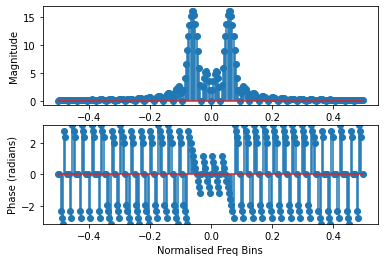

In [303]:
new_N = 256
y_signal_padded = zero_pad_signal(y_signal, new_N)
plot_dft_magnitude_angle(np.arange(new_N), f_signal=dft(y_signal_padded), fs=8000, format="Centered_Normalized") # Centered_Original_Scale, Centered_Normalized 

Q9: Why does the DFT of the zero-padded function look different than the the DFT of the original function?

Ans: Zero-padding means changing the DFT length N without adding more signal, which results in a denser sampling. Side lobes become visible by sampling in this more dense frequency grid. 

## 3.2.3 Resolving 2 Frequencies

We have created a signal, [new_y_signal] which is a combination of 2 sinusoids that have similar frequencies. Edit the parameter [new_n] until you can see 2 distinct frequencies in the frequency domain.

In [ ]:
#***************************** Change the parameter under this line *****************************
new_N = 32
#***************************** Change the parameter above this line *****************************
f1 = 6/N
f2 = 6.8/N
new_y_signal = np.sin(2*np.pi*f1*t_indices) + np.sin(2*np.pi*f2*t_indices)
new_y_signal_padded = zero_pad_signal(new_y_signal, new_N)
plot_dft_magnitude_angle(np.arange(new_N), f_signal=dft(new_y_signal_padded), fs=8000, format="Centered_Normalized")

Q10: What parameter [new_N] did you select?

Ans: [256]

## 3.3 Convolution

In this section we will implement convolution with the DFT. Our two signals of interest are x[n], a Sinc function, and y[n], a Gaussian function. We want to produce z[n] = x[n] * y[n].

/Users/sgb/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/sgb/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


[]

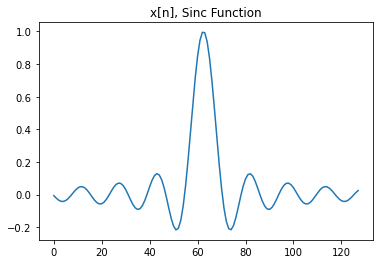

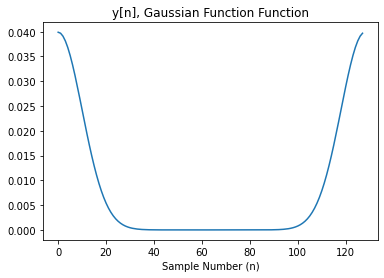

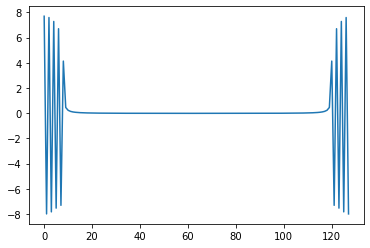

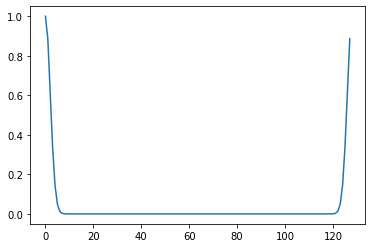

In [254]:
N = 128
t = np.arange(N)
x = np.sin(0.4*(t-N/2.05))/(0.4*(t-N/2.05))

std = 10
y = generate_gaussian_kernel(std, N)

plt.figure()
plt.plot(t, x)
plt.title("x[n], Sinc Function")
plt.figure()
plt.plot(t, y)
plt.title("y[n], Gaussian Function Function")
plt.xlabel("Sample Number (n)")

dfted_sinc = dft(x)
dfted_y = dft(y)
plt.figure()
plt.plot(t, dfted_sinc)


plt.figure()
plt.plot(t, dfted_y)


plt.plot()

Implement the function [convolve_signals] located in the [dsp_toolbox.py] file and then run the cell below.

/Users/sgb/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 0, 'Sample Number (n)')

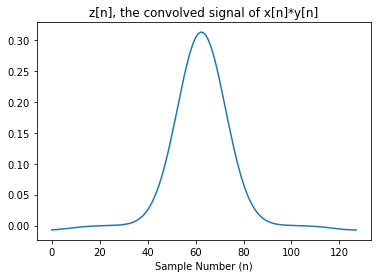

In [255]:
z_signal = convolve_signals(x, y)

plt.plot(z_signal)
plt.title("z[n], the convolved signal of x[n]*y[n]")
plt.xlabel("Sample Number (n)")

### 3.3.1 Removing Noise

We have now added noise to the original sinc function x[n] thus producing x_noise[n]. Let's try to pick a Gaussian function that will reduce the amount of noise in the signal. You will do this by adjusting the parameter [std], or the standard deviation of the Gaussian Function.

You can see how well you do with the comparison plot or by seeing how low you can make the L2 error between the original and filtered signal go.

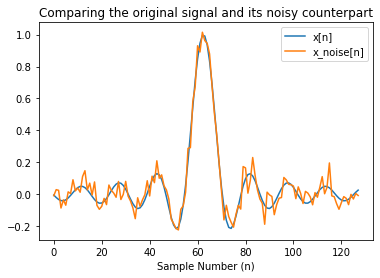

In [256]:
N = 128
t = np.arange(N)

noise = np.random.normal(loc=0, scale=0.05, size=N)
x_noise = np.sin(0.4*(t-N/2.05))/(0.4*(t-N/2.05)) + noise

plt.figure()
plt.plot(t, x, label = "x[n]")
plt.plot(t, x_noise, label = "x_noise[n]")
plt.title("Comparing the original signal and its noisy counterpart")
plt.xlabel("Sample Number (n)")
plt.legend()

/Users/sgb/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


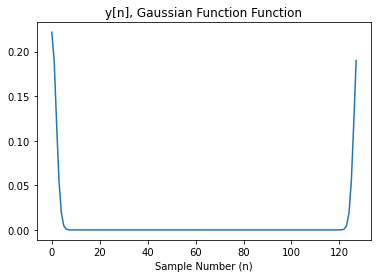

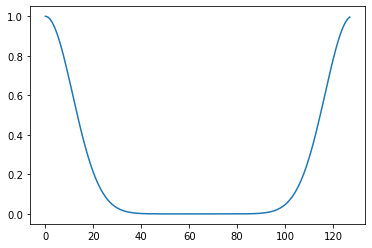

In [257]:
#***************************** Change the parameter under this line *****************************
#Try using parameters between 0.01 to 100
std = 1.8
#***************************** Change the parameter above this line *****************************
y = generate_gaussian_kernel(std, N)
plt.figure()
plt.plot(t, y)
plt.title("y[n], Gaussian Function Function")
plt.xlabel("Sample Number (n)")

plt.figure()
plt.plot(dft(y))



The L2 distance between the Noisy and Original Signal is: 0.5910108859700848
The L2 distance between the Filtered and Original signals is: 0.31306386270420516


/Users/sgb/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


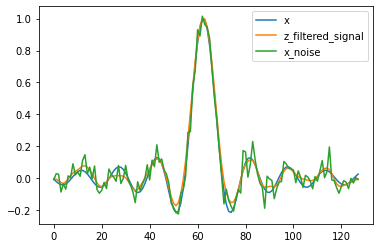

In [258]:
z_filtered_signal = convolve_signals(x_noise, y)
z_filtered_signal = z_filtered_signal / np.max(z_filtered_signal) #normalizing the filtered signal

plt.plot(x, label = "x")
plt.plot(z_filtered_signal, label = "z_filtered_signal")
plt.plot(x_noise, label = "x_noise")
plt.legend()
l2_dist_original = np.sqrt(np.sum(np.square(np.abs(x_noise - x))))
print(f"The L2 distance between the Noisy and Original Signal is: {l2_dist_original}")
l2_dist_now = np.sqrt(np.sum(np.square(np.abs(z_filtered_signal - x))))
print(f"The L2 distance between the Filtered and Original signals is: {l2_dist_now}")

Q11: What parameter [std] did you select to attenuate noise and what was the improvement in error?

Ans: I chose std = 0.01 because that is the parameter that makes z_filtered_signal most closely match the original x signal with no noise. The improvement in error from std = 100 was massive. 

@ std = 100, error = approx 10
@ std = 0.01 error = 0.3

### 3.3.2 Analyze the Noisy and Filtered Signal in the Frequency Domain

Plot and analyze the functions in this section, the first one has been done for you.

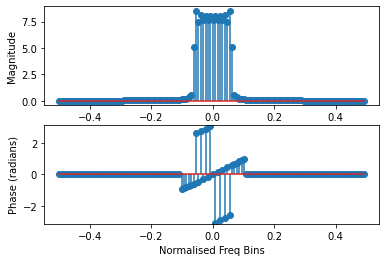

In [259]:
#0. Convert the original signal to the frequency domain via the DFT 
# and visualize it with your previously written plotting functions.

#***************************** Add your implementation under this line *****************************
plot_dft_magnitude_angle(np.arange(N), dft(x), format="Centered_Normalized") #This has been done for you already.
#***************************** Add your implementation above this line *****************************

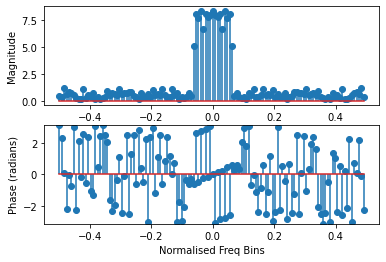

In [260]:
#1. Convert the noisy signal to the frequency domain via the DFT 
# and visualize it with your previously written plotting functions.

#***************************** Add your implementation under this line *****************************
plot_dft_magnitude_angle(np.arange(N), dft(x_noise), format="Centered_Normalized") #This has been done for you already.
#***************************** Add your implementation above this line *****************************

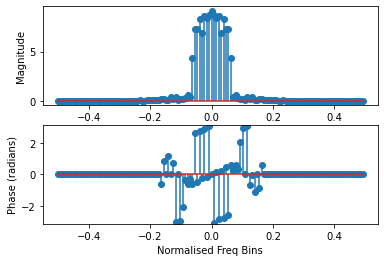

In [261]:
#2. Convert the filtered signal to the frequency domain via the DFT 
# and visualize it with your previously written plotting functions.

#***************************** Add your implementation under this line *****************************
plot_dft_magnitude_angle(np.arange(N), dft(z_filtered_signal), format="Centered_Normalized") #This has been done for you already.
#***************************** Add your implementation above this line *****************************

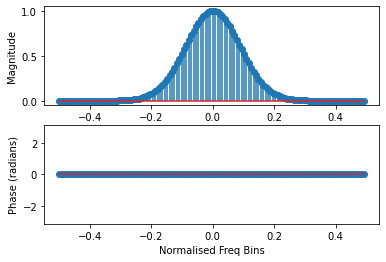

In [262]:
#3. Convert the Gaussian signal to the frequency domain via the DFT 
# and visualize it with your previously written plotting functions.

#***************************** Add your implementation under this line *****************************
plot_dft_magnitude_angle(np.arange(N), dft(y), format="Centered_Normalized") #This has been done for you already.
#***************************** Add your implementation above this line *****************************

Q12: Compare and contrast the frequency spectrums of the noisy and the filtered Signal:

Ans: 

Important points: 

- much of the phase plot of the filtered signal is zero (or approx 0) except at an equidistant off the centre, where there are symmetrical (opposite polarity) values about the centreline at 0
- phase: the non-zero values in the filtered signal are also present in the noisy signal (i.e that portion of the graph has not changed significantly from noisy to filtered)
- the shape of the two magnitude plots are very similar, but the values that are near zero in the noisy signal are much closer to zero in the filtered signal

Q13: Why does the filtered signal's spectrum make sense when compared with the Gaussian signal's frequency spectrum?
- 

Ans: In the noisy signal, the points which are 'almost' zero but not have become much more attenuated in the filtered signal. 

You can see from the Gaussian polot that the magnitude of the FT of the Gaussian approaches zero in those respective areas, which shows the effect of the attenuation. 

You can also see that between the filtered and unfiltered signal, there is not much difference in the signal around the centre at 0. This is because, as seen in the Gaussian plot, the Gaussian approaches 1 (unity) at these points. 